# Finite differences Error rigid body

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

In [2]:
def distance_to_edge(a, b, c):
    ab = b - a
    ac = c - a
    bc = c - b
    e = ac.dot(ab)
    f = ab.dot(ab)
    return sqrt(ac.dot(ac) - e * e / f)

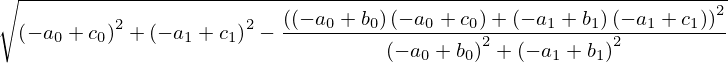

In [3]:
a = Matrix(symbols("a_0:2"))
b = Matrix(symbols("b_0:2"))
c = Matrix(symbols("c_0:2"))
func_d = distance_to_edge(a, b, c)
func_d

In [4]:
print(diff(func_d, c[0]))

(-a_0 + c_0 - (-2*a_0 + 2*b_0)*((-a_0 + b_0)*(-a_0 + c_0) + (-a_1 + b_1)*(-a_1 + c_1))/(2*((-a_0 + b_0)**2 + (-a_1 + b_1)**2)))/sqrt((-a_0 + c_0)**2 + (-a_1 + c_1)**2 - ((-a_0 + b_0)*(-a_0 + c_0) + (-a_1 + b_1)*(-a_1 + c_1))**2/((-a_0 + b_0)**2 + (-a_1 + b_1)**2))


In [9]:
# original test values
va = np.array([10.0, 1.0])
vb = np.array([-10.0, 1.0])
vc = np.array([-7.8, 1.00077477416])

In [6]:
def g(x):
    c = np.array([x, vc[1]])
    return distance_to_edge(va, vb, c)

In [7]:
def g_diff(x, h):
    diffx = [0] * len(x)
    for i, xi in enumerate(x):
        diffx[i] = (g(xi-0.5*h) - g(xi+0.5*h))/h
    return np.array(diffx)

def grad(x):
    diffx = [0] * len(x)
    a_0 = va[0]
    a_1 = va[1]
    b_0 = vb[0]
    b_1 = vb[1]
   #c_0 = vc[0]
    c_1 = vc[1]
    for i, c_0 in enumerate(x):
        diffx[i] = (-a_0 + c_0 - (-2*a_0 + 2*b_0)*((-a_0 + b_0)*(-a_0 + c_0) + (-a_1 + b_1)*(-a_1 + c_1))/(2*((-a_0 + b_0)**2 + (-a_1 + b_1)**2)))/sqrt((-a_0 + c_0)**2 + (-a_1 + c_1)**2 - ((-a_0 + b_0)*(-a_0 + c_0) + (-a_1 + b_1)*(-a_1 + c_1))**2/((-a_0 + b_0)**2 + (-a_1 + b_1)**2))
    return np.array(diffx)


<IPython.core.display.Javascript object>


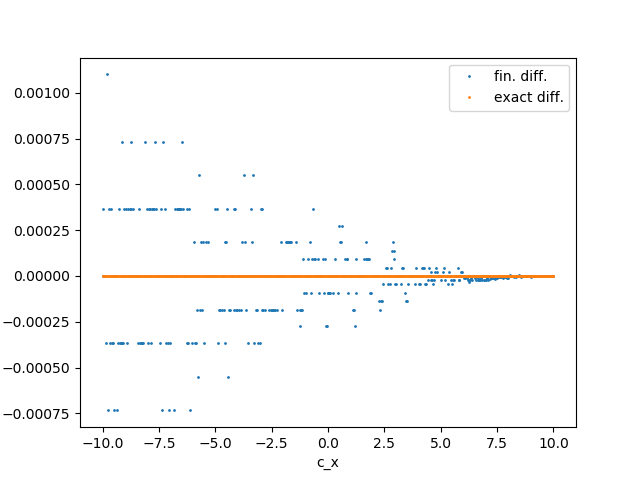

In [8]:
x = np.linspace(-10, 10, 500)
# visualize abs difference
h = 1e-7
g_diff_ = g_diff(x,h)
diff_ = grad(x)

fig, ax = plt.subplots()
plt.plot(x, g_diff_, label='fin. diff.', linestyle = 'None', marker='o', markersize=1.0)
plt.plot(x, diff_, label='exact diff.', linestyle = 'None', marker='o', markersize=1.0)

plt.xlabel('c_x')
plt.ylabel('abs difference')
plt.legend()
plt.show()